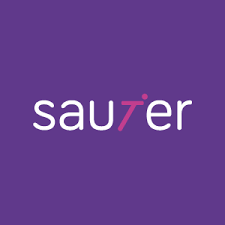
# Desafio Case Python - Sauter
------

## Tarefa 1: Capturar dados de Loja de Aplicativo - Google Play

In [6]:
# Instalação da biblioteca google-play-scraper
!pip install -qq google-play-scraper

In [7]:
# Importando métodos Sort e reviews para buscar avaliações do aplicativo pela biblioteca google_play_scraper
#from google_play_scraper import Sort, reviews_all
from google_play_scraper import Sort, reviews
import json # Importa biblioteca JSON para melhor visualização dos dados
import pandas as pd # Importa biblioteca pandas para analise de dados

'''
# Criando uma lista com os resultados das análises do app rastreados 
resultado = reviews_all(
    'com.amazon.dee.app',     # Busca os dados do app Alexa
    #sleep_milliseconds=0,    # Define limite em 0 milisegundos para rastrear
    lang='pt',                # Define linguagem como família português
    country='br',             # Define a região de origem como Brasil
    sort=Sort.RATING          # Pesquisa por avaliação (RATING)
)
'''
resultado, continuation_token = reviews(
    'com.amazon.dee.app',     # Busca os dados do app Alexa
    lang='pt',                # Define linguagem como família português
    country='br',             # Define a região de origem como Brasil
    sort=Sort.MOST_RELEVANT,  # Pesquisa por maior relevância(MOST_RELEVANT), mais recente(NEWEST) ou avaliação(RATING)
    count=1000,              # Define para buscar 1000 resultados. Por padrão busca os 100 primeiros
    filter_score_with=None    # Define None para buscar todas as pontuações de avaliação
)

resultado, _ = reviews(
    'com.amazon.dee.app',
    continuation_token=continuation_token
)

In [8]:
print(resultado) # Mostrar os resultados das avaliações 

[{'reviewId': 'gp:AOqpTOFGwP88ioCkYMIgZdpSmBRyJW7tK-rLo5yF9IvMybcPKPoqpgfPBSCOdh8o1lc4048c3TS_-ah03VSwkg', 'userName': 'Marcelo Lelo', 'userImage': 'https://play-lh.googleusercontent.com/a-/AOh14GhbTk5ZK6zsf8qcMh9ka59d4skaUIAot5BuVEidag', 'content': 'Custa acessar a conta parece q está sempre fora do ar . Quando entra é um sufoco', 'score': 2, 'thumbsUpCount': 0, 'reviewCreatedVersion': '2.2.438005.0', 'at': datetime.datetime(2021, 12, 22, 1, 10, 56), 'replyContent': None, 'repliedAt': None}, {'reviewId': 'gp:AOqpTOGn9IH7GKUBj2saLr6oBGZtgHqv2XPRWY1TI-Xgb1NcwCYE_anXNaA74dw05MJlBiBDuiZcVEgUFhrfkg', 'userName': "Vinícius Sant' Anna Debone", 'userImage': 'https://play-lh.googleusercontent.com/a-/AOh14Gh2cVpxRl8XPbAB1WwN6kJxgMV2UNc04--k8ctD7g', 'content': 'Cheio de bug, não funciona direito o app. Já tentei várias coisas e nada.', 'score': 1, 'thumbsUpCount': 1, 'reviewCreatedVersion': '2.2.432925.0', 'at': datetime.datetime(2021, 11, 6, 12, 10, 32), 'replyContent': None, 'repliedAt': None}

### Visualizar os dados em JSON

In [9]:
json_alexa = print(json.dumps(resultado, indent=4, default=str))

[
    {
        "reviewId": "gp:AOqpTOFGwP88ioCkYMIgZdpSmBRyJW7tK-rLo5yF9IvMybcPKPoqpgfPBSCOdh8o1lc4048c3TS_-ah03VSwkg",
        "userName": "Marcelo Lelo",
        "userImage": "https://play-lh.googleusercontent.com/a-/AOh14GhbTk5ZK6zsf8qcMh9ka59d4skaUIAot5BuVEidag",
        "content": "Custa acessar a conta parece q est\u00e1 sempre fora do ar . Quando entra \u00e9 um sufoco",
        "score": 2,
        "thumbsUpCount": 0,
        "reviewCreatedVersion": "2.2.438005.0",
        "at": "2021-12-22 01:10:56",
        "replyContent": null,
        "repliedAt": null
    },
    {
        "reviewId": "gp:AOqpTOGn9IH7GKUBj2saLr6oBGZtgHqv2XPRWY1TI-Xgb1NcwCYE_anXNaA74dw05MJlBiBDuiZcVEgUFhrfkg",
        "userName": "Vin\u00edcius Sant' Anna Debone",
        "userImage": "https://play-lh.googleusercontent.com/a-/AOh14Gh2cVpxRl8XPbAB1WwN6kJxgMV2UNc04--k8ctD7g",
        "content": "Cheio de bug, n\u00e3o funciona direito o app. J\u00e1 tentei v\u00e1rias coisas e nada.",
        "score": 1,
     

### Visualizar os dados em Data Frame

In [10]:
# Salvando a lista de resultado em um DataFrame com pandas
df_alexa = pd.DataFrame(resultado)
df_alexa # Mostrando o DataFrame

reviewId  ... repliedAt
0    gp:AOqpTOFGwP88ioCkYMIgZdpSmBRyJW7tK-rLo5yF9Iv...  ...      None
1    gp:AOqpTOGn9IH7GKUBj2saLr6oBGZtgHqv2XPRWY1TI-X...  ...      None
2    gp:AOqpTOGfHetqDAmvefw5XOY2-MwZygMTkYuWYMrxHpM...  ...      None
3    gp:AOqpTOHdvjiycRw6m4xjDBIah0VD8u8k4oqJTXlJ7Ou...  ...      None
4    gp:AOqpTOELFEIoatU6AGGeeysE_JqTA93Px907uYQ_mpb...  ...      None
..                                                 ...  ...       ...
995  gp:AOqpTOGFvZkPrMogetQePeHLu7YCfhp6zipsPa6zNwV...  ...      None
996  gp:AOqpTOGua70XbbiBldi-oC5IsueXANla3cUrs-VYdxN...  ...      None
997  gp:AOqpTOHrwgkQMml60pTdPBj8628x8LUKA07BbU3-eeS...  ...      None
998  gp:AOqpTOHCyvniRLs9s7kDktKRs_3grd6kGwCaoZpkGcI...  ...      None
999  gp:AOqpTOHmyTF4772AZ5vPZ755q4Nn70txny6Qz2OPuSw...  ...      None

[1000 rows x 10 columns]

#### Filtrar colunas do DataFrame

In [11]:
# Filtrando colunas selecionadas com o método filter
df_alexa = df_alexa.filter(['content', 'score',	'thumbsUpCount',	'reviewCreatedVersion',	'at',	'replyContent',	'repliedAt'])
df_alexa

content  ...  repliedAt
0    Custa acessar a conta parece q está sempre for...  ...       None
1    Cheio de bug, não funciona direito o app. Já t...  ...       None
2    Parou de funcionar. Apresenta mensagem de que ...  ...       None
3    App não funciona, tenho 3 echo studios e mais ...  ...       None
4              app lento e com travamentos constantes.  ...       None
..                                                 ...  ...        ...
995  Não conecta com o YouTube music... inaceitável!!!  ...       None
996  Ótima. As vezes não faz o comando tendo que re...  ...       None
997                        Perfeito, fácil aplicação..  ...       None
998                     Perfeito, sem mais detalhes...  ...       None
999  Esse aplicativo é tão bom que me fez chorar no...  ...       None

[1000 rows x 7 columns]

### Clasificar dados do DataFrame

#### Classificação Positiva

In [12]:
# Classificação positiva (maior ou igual a 4)
df_aval_positiva = df_alexa.loc[df_alexa['score'] >= 4]
df_aval_positiva

content  ...  repliedAt
7    Desafiante, emocionante. A tecnologia sci fi s...  ...       None
10   Esss APK é muito bom e funciona mesmo... "reco...  ...       None
13                    aplicativo perfeito. muito útil.  ...       None
14   Ruim de gerenciar cômodos e definir o lugar de...  ...       None
16   Som de ótima qualidade. Tem algumas coisas que...  ...       None
..                                                 ...  ...        ...
994  comprei uma Alexa echo dot 3 kids e não muda o...  ...       None
996  Ótima. As vezes não faz o comando tendo que re...  ...       None
997                        Perfeito, fácil aplicação..  ...       None
998                     Perfeito, sem mais detalhes...  ...       None
999  Esse aplicativo é tão bom que me fez chorar no...  ...       None

[626 rows x 7 columns]

In [13]:
# Salvar classificação positiva em arquivo CSV
df_aval_positiva.to_csv('aval_positiva.csv',  # Definie o nome do arquivo
                        encoding='utf-8',     # Definie a codificação para utf-8
                        index=False,          # Define a retirada do index
                        sep=',',              # Define o separador como ','
                        header=True           # Define salvar como cabeçalho
)

In [14]:
pd.read_csv('aval_positiva.csv') # Confirmar a leitura do arquivo CSV

content  ...  repliedAt
0    Desafiante, emocionante. A tecnologia sci fi s...  ...        NaN
1    Esss APK é muito bom e funciona mesmo... "reco...  ...        NaN
2                     aplicativo perfeito. muito útil.  ...        NaN
3    Ruim de gerenciar cômodos e definir o lugar de...  ...        NaN
4    Som de ótima qualidade. Tem algumas coisas que...  ...        NaN
..                                                 ...  ...        ...
621  comprei uma Alexa echo dot 3 kids e não muda o...  ...        NaN
622  Ótima. As vezes não faz o comando tendo que re...  ...        NaN
623                        Perfeito, fácil aplicação..  ...        NaN
624                     Perfeito, sem mais detalhes...  ...        NaN
625  Esse aplicativo é tão bom que me fez chorar no...  ...        NaN

[626 rows x 7 columns]

#### Classificação Neutra

In [15]:
# Classificação neutra (Igual a 3)
df_aval_neutra = df_alexa.loc[df_alexa['score'] == 3]
df_aval_neutra

content  ...  repliedAt
4              app lento e com travamentos constantes.  ...       None
22   App bacana, com várias opções... porém, muito ...  ...       None
27   APP não está totalmente em português. É frustr...  ...       None
29   Engasgos na leitura dos ebook. Desisti de usar...  ...       None
34   Não é sempre que Alexa ouve o chamado e atende...  ...       None
..                                                 ...  ...        ...
934       não posso adicionar o Youtube no aplicativo.  ...       None
943  Não consigo configurar música ambiente com vár...  ...       None
945  Gostei, mas configurar mais de um Wi-Fi é bem ...  ...       None
964  Quando vão consertar o bug dela voltar a ler o...  ...       None
983  Eu trocaria o Google Assistente pela Alexa "se...  ...       None

[98 rows x 7 columns]

In [16]:
# Salvar classificação neutra em arquivo CSV
df_aval_neutra.to_csv('aval_neutra.csv',   # Definie o nome do arquivo
                        encoding='utf-8',  # Definie a codificação para utf-8
                        index=False,       # Define a retirada do index
                        sep=',',           # Define o separador como ','
                        header=True        # Define salvar como cabeçalho
)

In [17]:
pd.read_csv('aval_neutra.csv') # Confirmar a leitura do arquivo CSV

content  ...  repliedAt
0             app lento e com travamentos constantes.  ...        NaN
1   App bacana, com várias opções... porém, muito ...  ...        NaN
2   APP não está totalmente em português. É frustr...  ...        NaN
3   Engasgos na leitura dos ebook. Desisti de usar...  ...        NaN
4   Não é sempre que Alexa ouve o chamado e atende...  ...        NaN
..                                                ...  ...        ...
93       não posso adicionar o Youtube no aplicativo.  ...        NaN
94  Não consigo configurar música ambiente com vár...  ...        NaN
95  Gostei, mas configurar mais de um Wi-Fi é bem ...  ...        NaN
96  Quando vão consertar o bug dela voltar a ler o...  ...        NaN
97  Eu trocaria o Google Assistente pela Alexa "se...  ...        NaN

[98 rows x 7 columns]

#### Classificação Negativa

In [18]:
# Classificação negativa (Menor que 3)
df_aval_negativa = df_alexa.loc[df_alexa['score'] < 3]
df_aval_negativa

content  ...  repliedAt
0    Custa acessar a conta parece q está sempre for...  ...       None
1    Cheio de bug, não funciona direito o app. Já t...  ...       None
2    Parou de funcionar. Apresenta mensagem de que ...  ...       None
3    App não funciona, tenho 3 echo studios e mais ...  ...       None
5    O app demora uma eternidade para abrir a págin...  ...       None
..                                                 ...  ...        ...
980                           aplicativo é MUITO lento  ...       None
985                             APP extremamente lento  ...       None
986  Trava muito, por diversas vezes não consigo ac...  ...       None
989  Ela não entende o que a gente fala. Tem que ap...  ...       None
995  Não conecta com o YouTube music... inaceitável!!!  ...       None

[276 rows x 7 columns]

In [19]:
# Salvar classificação negativa em arquivo CSV na mesma pasta atual
df_aval_negativa.to_csv('aval_negativa.csv',  # Definie o nome do arquivo
                        encoding='utf-8',     # Definie a codificação para utf-8
                        index=False,          # Define a retirada do index
                        sep=',',              # Define o separador como ','
                        header=True           # Define salvar como cabeçalho
)

In [20]:
pd.read_csv('aval_negativa.csv') # Confirmar a leitura do arquivo CSV

content  ...  repliedAt
0    Custa acessar a conta parece q está sempre for...  ...        NaN
1    Cheio de bug, não funciona direito o app. Já t...  ...        NaN
2    Parou de funcionar. Apresenta mensagem de que ...  ...        NaN
3    App não funciona, tenho 3 echo studios e mais ...  ...        NaN
4    O app demora uma eternidade para abrir a págin...  ...        NaN
..                                                 ...  ...        ...
271                           aplicativo é MUITO lento  ...        NaN
272                             APP extremamente lento  ...        NaN
273  Trava muito, por diversas vezes não consigo ac...  ...        NaN
274  Ela não entende o que a gente fala. Tem que ap...  ...        NaN
275  Não conecta com o YouTube music... inaceitável!!!  ...        NaN

[276 rows x 7 columns]

### Criar um report simples com Pandas Profiling

In [23]:
# Instalação da biblioteca pandas-profiling
! pip install -qq https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [31]:
# # Importando métodos ProfileReport buscar criação de relatórios pela biblioteca pandas_profiling
from pandas_profiling import ProfileReport

In [37]:
df_positiva = pd.read_csv('aval_positiva.csv')                              # Carregando arquivo CSV em um DataFrame
profile_positiva = ProfileReport(df_positiva, 
                                 title="Relatório - Avaliações Positivas")  # Criando a função de relatório a partir do DataFrame carregado
profile_positiva                                                            # Carregando o relatório para visualização

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [38]:
# Salvando relatório em formato HTML
profile_positiva.to_file("relatorio_positiva.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [36]:
df_neutra = pd.read_csv('aval_neutra.csv')                             # Carregando arquivo CSV em um DataFrame
profile_neutra = ProfileReport(df_neutra,
                               title="Relatório - Avaliações Neutras") # Criando a função de relatório a partir do DataFrame carregado
profile_neutra                                                         # Carregando o relatório para visualização

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [39]:
# Salvando relatório em formato HTML
profile_neutra.to_file("relatorio_neutra.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [35]:
df_negativa = pd.read_csv('aval_negativa.csv')                             # Carregando arquivo CSV em um DataFrame
profile_negativa = ProfileReport(df_negativa, 
                                 title="Relatório - Avaliações Negativas") # Criando a função de relatório a partir do DataFrame carregado
profile_negativa                                                           # Carregando o relatório para visualização


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [40]:
# Salvando relatório em formato HTML
profile_negativa.to_file("relatorio_negativa.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]